## Visualize cross

- distribution of detection

In [1]:
import sys

sys.path.append("/home/jeans/internship/parking-customer-count")

from countpassenger.Config import conf
from countpassenger import Preprocess

import countpassenger
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import os


df_cross = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "2024-04-28/mbk-tourist-raw-cross-object-20240428.csv")
)

df_reverse = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "2024-04-28/mbk-tourist-raw-reverse-object-20240428.csv")
)

In [2]:
df_cross = Preprocess.df_clean_customer(df_customer=df_cross)
print(
    df_cross.sort_values(by=conf.CUSTOMER_INTEREST_SNAPSHOT)[
        conf.CUSTOMER_INTEREST_SNAPSHOT
    ].to_string()
)
# mbk-14-14-vehicle-snapshot 2024-04-29 09:44:22.571   292  1030     0  1149   37.511000          NaN                      NaN          van                 0.996053

         camera       timestamp_precise  xmin  xmax  ymin  ymax
2730  mbk-14-11 2024-04-28 02:00:18.401  1832  1991   241   576
2713  mbk-14-11 2024-04-28 02:28:18.469  1064  1370   412  1075
2700  mbk-14-11 2024-04-28 02:30:09.642  1469  1677   147   803
2694  mbk-14-11 2024-04-28 02:35:01.000   441   801   697  1264
2675  mbk-14-11 2024-04-28 02:56:10.105  1455  1715   189   808
2676  mbk-14-11 2024-04-28 02:57:19.086  1930  2108   245   480
2659  mbk-14-11 2024-04-28 03:02:30.324  1485  1747   131   765
2660  mbk-14-11 2024-04-28 03:02:37.482  1623  1759   203   833
2662  mbk-14-11 2024-04-28 03:02:48.319  1808  1940   264   784
2661  mbk-14-11 2024-04-28 03:02:49.319  1546  1715   220   831
2664  mbk-14-11 2024-04-28 03:02:54.477  1473  1731   114   801
2663  mbk-14-11 2024-04-28 03:03:02.714  1548  1694   213   768
2666  mbk-14-11 2024-04-28 03:03:08.713  1492  1736   182   817
2665  mbk-14-11 2024-04-28 03:03:12.072  1516  1733   185   791
2667  mbk-14-11 2024-04-28 03:03:15.072 

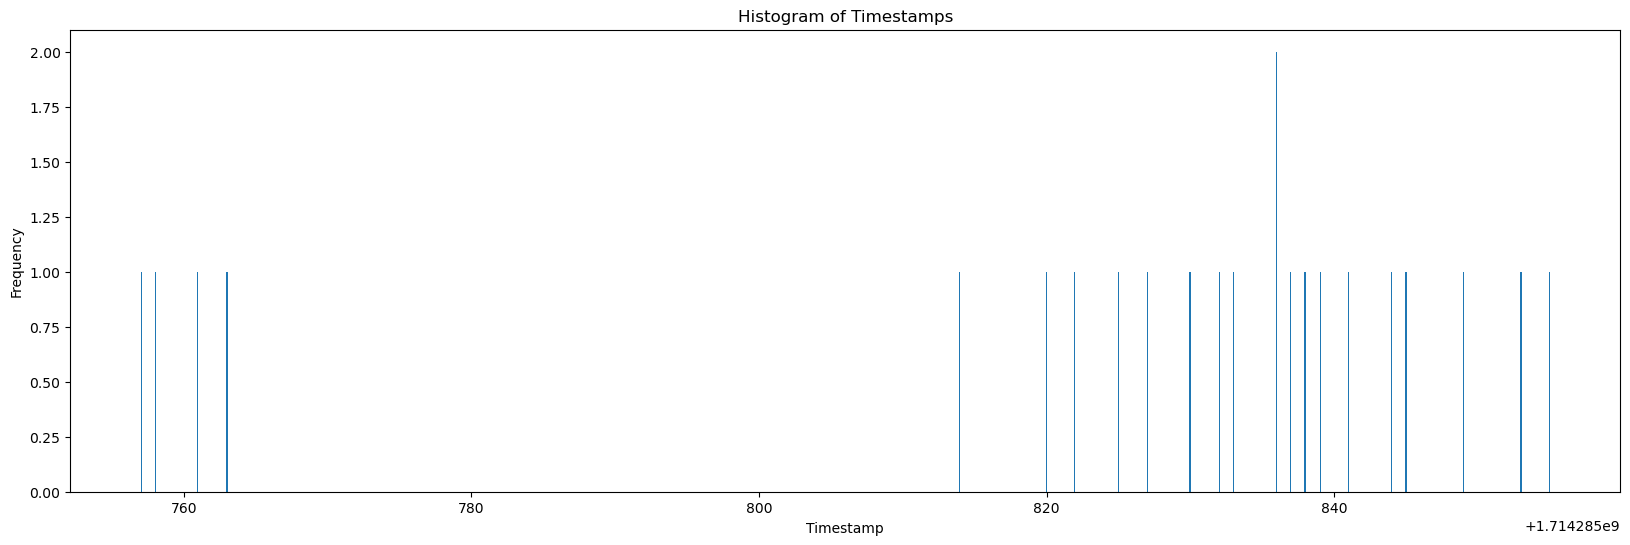

In [3]:
df_samecam = df_cross[df_cross["camera"] == "mbk-14-12"]


plt.figure(figsize=(20, 6))  # Set the figure size to 10 inches wide and 6 inches tall
# plt.hist(df_samecam[(df_samecam['timestamp_unix'] >= 1714283888) & (df_samecam['timestamp_unix'] <= 1714288000)]['timestamp_unix'], bins=1200) #06-07
plt.hist(
    df_samecam[
        (df_samecam["timestamp_unix"] >= 1714285700) & (df_samecam["timestamp_unix"] <= 1714286000)
    ]["timestamp_unix"],
    bins=1200,
)  # 06:28-06:33

plt.xlabel("Timestamp")
plt.ylabel("Frequency")
plt.title("Histogram of Timestamps")
plt.show()

      travel_distance  lifetime  ymin  xmin  xmax     camera  travel_displacement            timestamp  travel_trajectory  frame_no       original_video_name  ymax       timestamp_precise           true_video_name                video_name camera_cleaned  timestamp_unix  xmax_std  ymax_std  timestamp_unix_std  cluster
1821       408.484212     2.999     0  2100  2159  mbk-14-12           399.539583  2024-04-28 06:40:01          358.15239      2374  mbk-14-12_1714286101.mp4   103 2024-04-28 06:39:56.881  mbk-14-12_1714286101.mp4  mbk-14-12_1714286401.mp4      mbk-14-12      1714286396  1.350228 -1.674099            3.050398       -1


/tmp/ipykernel_82210/4180222839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested_time[["xmax_std", "ymax_std"]] = scaler_xy.fit_transform(df_interested_time[["xmax", "ymax"]])
/tmp/ipykernel_82210/4180222839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested_time[["xmax_std", "ymax_std"]] = scaler_xy.fit_transform(df_interested_time[["xmax", "ymax"]])
/tmp/ipykernel_82210/4180222839.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

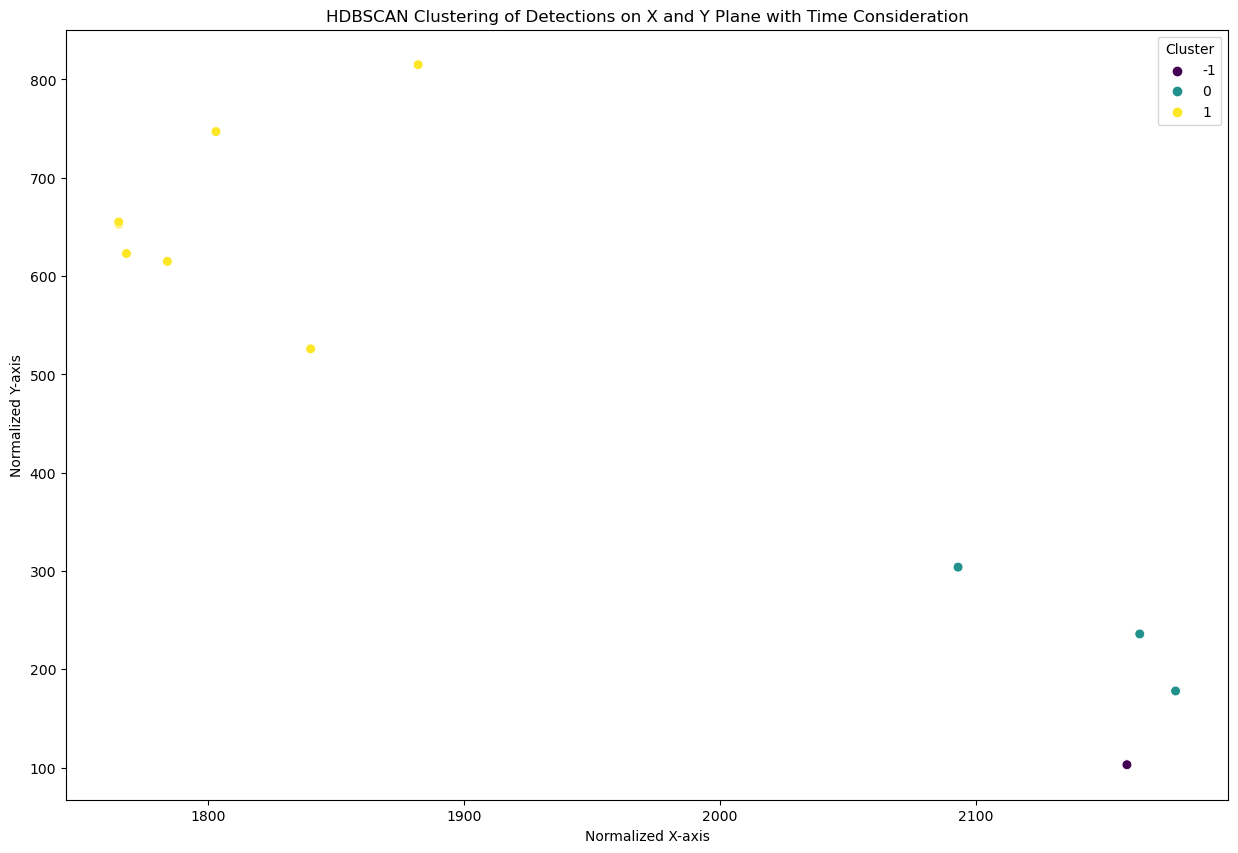

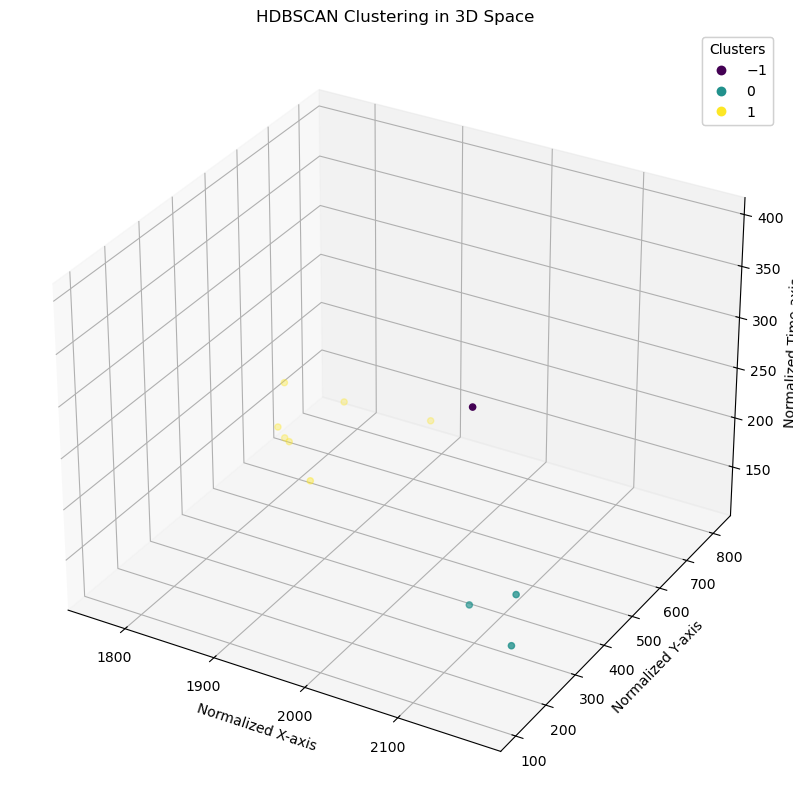

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_samecam is your DataFrame
# Filter the DataFrame for the interested time range
start_time = 1714286100
end_time = 1714286400
df_interested_time = df_samecam[(df_samecam["timestamp_unix"] >= start_time) & (df_samecam["timestamp_unix"] <= end_time)]

# Normalize the x and y coordinates
scaler_xy = StandardScaler()
df_interested_time[["xmax_std", "ymax_std"]] = scaler_xy.fit_transform(df_interested_time[["xmax", "ymax"]])

# Normalize the timestamp_unix values
scaler_time = StandardScaler()
df_interested_time[["timestamp_unix_std"]] = scaler_time.fit_transform(df_interested_time[["timestamp_unix"]])

# Create a 3D array combining x, y, and timestamp_unix
data = df_interested_time[["xmax_std", "ymax_std", "timestamp_unix_std"]].values

# Define the HDBSCAN clustering algorithm
# min_cluster_size is the minimum size of clusters
min_cluster_size = 2  # You might need to adjust this value
max_cluster_size = 40

# Apply HDBSCAN
clusterer = HDBSCAN(min_cluster_size=min_cluster_size, max_cluster_size=max_cluster_size)
df_interested_time["cluster"] = clusterer.fit_predict(data)
print(df_interested_time[df_interested_time['cluster'] == -1].to_string())
# Plot the clusters in 2D (x, y) space, colored by cluster
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_interested_time,
    x="xmax",
    y="ymax",
    hue="cluster",
    palette="viridis",
    legend="full",
    s=50,
)

# Add title and labels
plt.title("HDBSCAN Clustering of Detections on X and Y Plane with Time Consideration")
plt.xlabel("Normalized X-axis")
plt.ylabel("Normalized Y-axis")
plt.legend(title="Cluster")

# Show the plot
plt.show()

# Optionally, plot clusters in 3D space (x, y, time)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    df_interested_time["xmax"],
    df_interested_time["ymax"],
    df_interested_time["timestamp_unix"],
    c=df_interested_time["cluster"],
    cmap="viridis",
)

# Add title and labels
ax.set_title("HDBSCAN Clustering in 3D Space")
ax.set_xlabel("Normalized X-axis")
ax.set_ylabel("Normalized Y-axis")
ax.set_zlabel("Normalized Time-axis")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()


/tmp/ipykernel_82210/1084956688.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested_time[['xmax', 'ymax']] = scaler.fit_transform(df_interested_time[['xmax', 'ymax']])
/tmp/ipykernel_82210/1084956688.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested_time['cluster'] = db.labels_


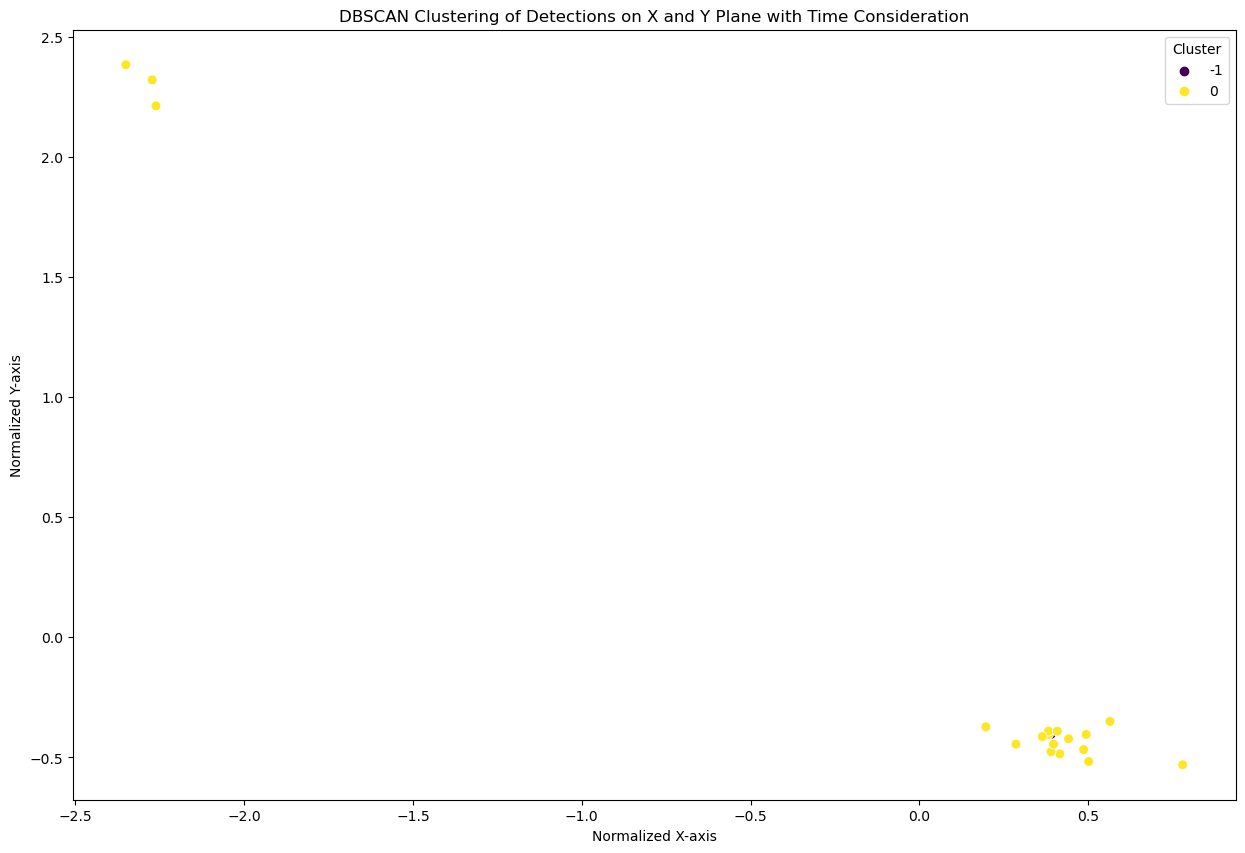

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_samecam is your DataFrame
# Filter the DataFrame for the interested time range
df_interested_time = df_samecam[(df_samecam['timestamp_unix'] >= 1714285800) & (df_samecam['timestamp_unix'] <= 1714285900)]

# Normalize the x and y coordinates to have comparable scales
scaler = StandardScaler()
df_interested_time[['xmax', 'ymax']] = scaler.fit_transform(df_interested_time[['xmax', 'ymax']])

# Create a 3D array combining x, y, and timestamp_unix
data = df_interested_time[['xmax', 'ymax', 'timestamp_unix']].values

# Define the DBSCAN clustering algorithm
# eps is the maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point
# eps needs to be chosen carefully based on the scale of your normalized data and the time range (40 seconds)
eps = 4.3  # This is a placeholder value. You might need to adjust it.
min_samples = 2  # Minimum number of points to form a cluster

# Apply DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(data)

# Add the cluster labels to the DataFrame
df_interested_time['cluster'] = db.labels_

# Plot the clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_interested_time, x='xmax', y='ymax', hue='cluster', palette='viridis', legend='full', s=50)

# Add title and labels
plt.title('DBSCAN Clustering of Detections on X and Y Plane with Time Consideration')
plt.xlabel('Normalized X-axis')
plt.ylabel('Normalized Y-axis')
plt.legend(title='Cluster')

# Show the plot
plt.show()


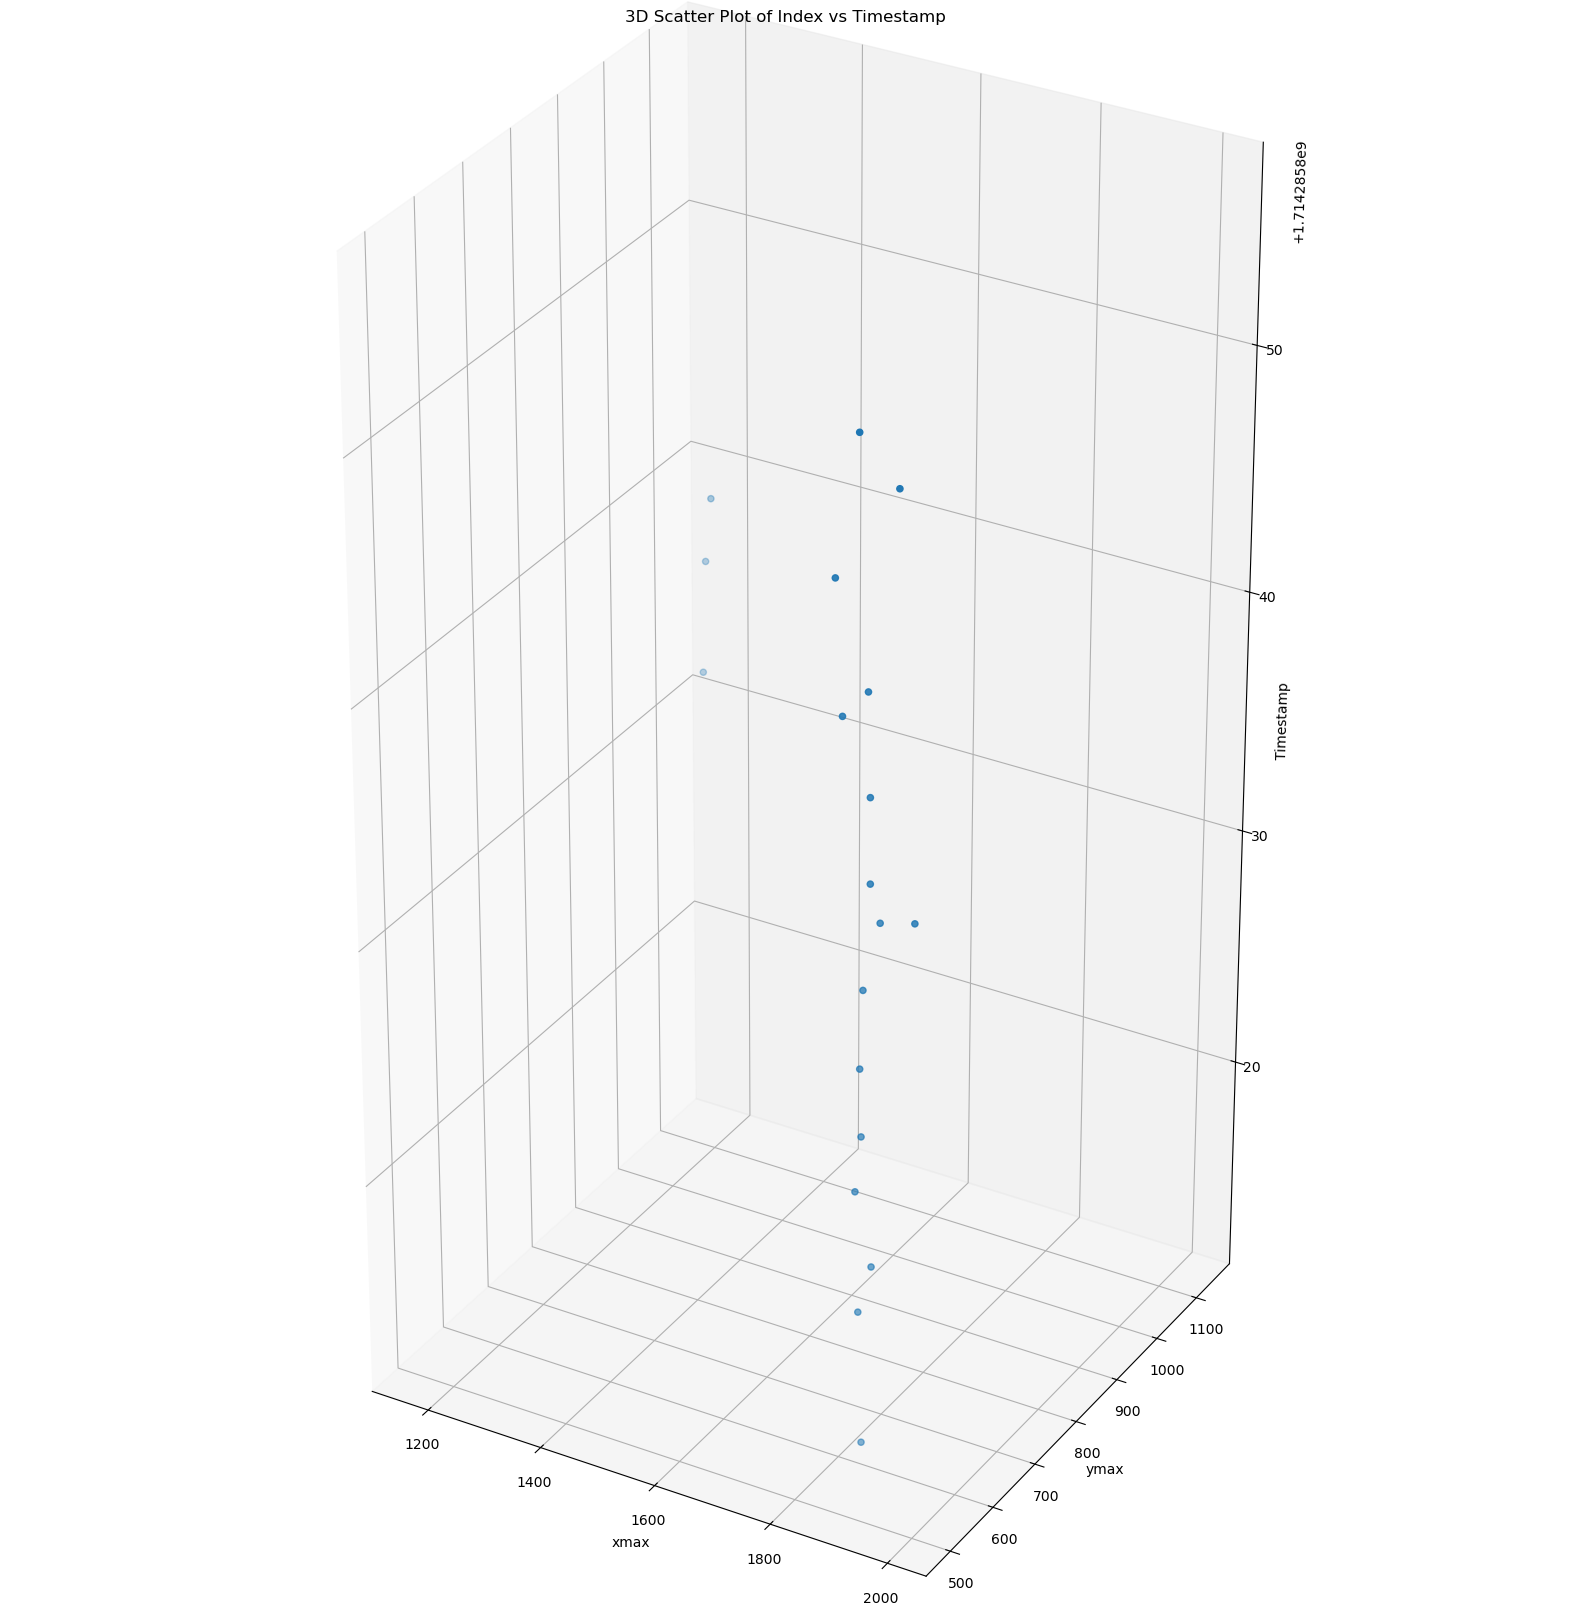

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_samecam = df_cross[df_cross["camera"] == "mbk-14-12"]

# df_samecam['timestamp_unix'] = pd.to_datetime(df_samecam['timestamp_unix'])

fig = plt.figure(figsize=(20, 100))
ax = fig.add_subplot(111, projection="3d")


df_interested_time = df_samecam[
    (df_samecam["timestamp_unix"] >= 1714285800) & (df_samecam["timestamp_unix"] <= 1714285900)
]
ax.scatter(
    df_interested_time["xmax"], df_interested_time["ymax"], df_interested_time["timestamp_unix"]
)
ax.set_xlabel("xmax")
ax.set_ylabel("ymax")
ax.set_zlabel("Timestamp")
ax.set_title("3D Scatter Plot of Index vs Timestamp")

# Set the aspect ratio of the axes
ax.set_box_aspect((1, 1, 2))  # Set the aspect ratio to 1, 1, 5
plt.show()

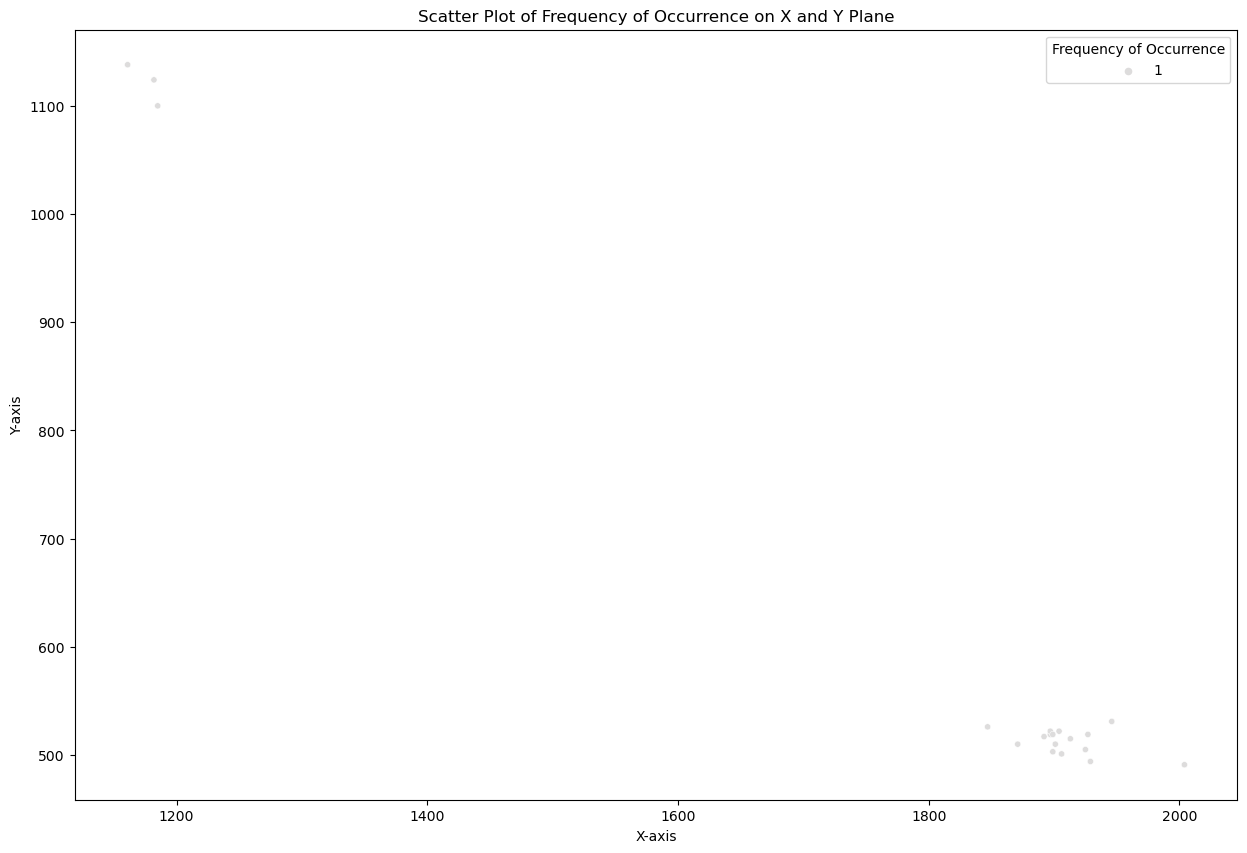

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_samecam is your DataFrame
# Filter the DataFrame for the interested time range
df_interested_time = df_samecam[
    (df_samecam["timestamp_unix"] >= 1714285800) & (df_samecam["timestamp_unix"] <= 1714285900)
]

# Group by 'xmax' and 'ymax' and count the occurrences of 'timestamp_unix'
df_count = df_interested_time.groupby(["xmax", "ymax"]).size().reset_index(name="count")

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_count,
    x="xmax",
    y="ymax",
    size="count",
    hue="count",
    sizes=(20, 200),
    palette="coolwarm",
    legend="full",
)

# Add title and labels
plt.title("Scatter Plot of Frequency of Occurrence on X and Y Plane")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(title="Frequency of Occurrence")

# Show the plot
plt.show()

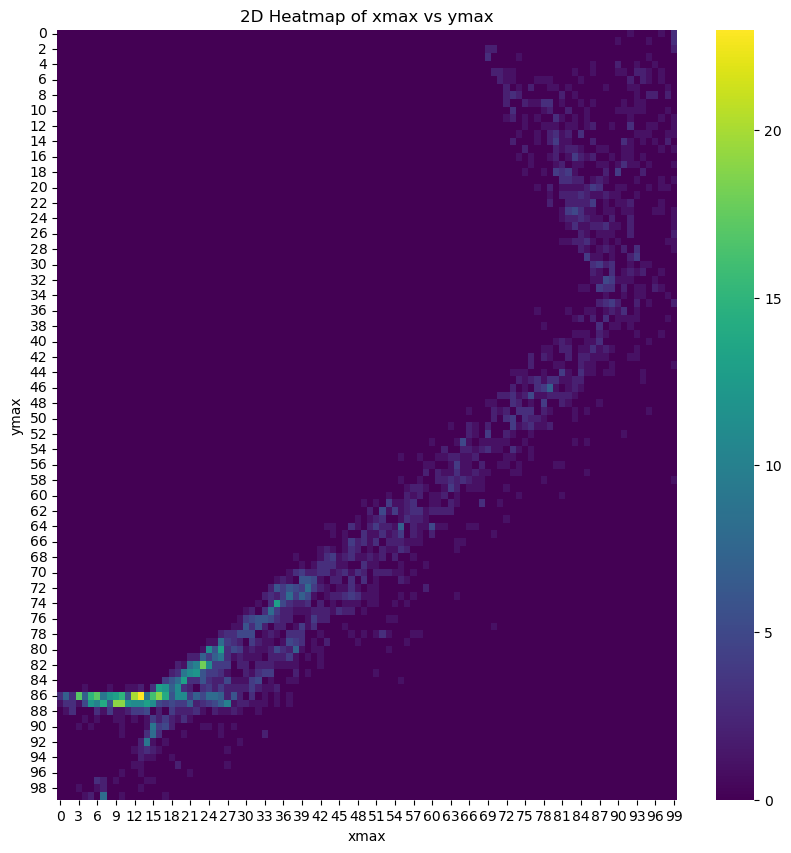

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a 2D grid of x and y values
x = df_cross["xmax"]
y = df_cross["ymax"]

# Create a 2D histogram of the data
hist, xedges, yedges = np.histogram2d(x, y, bins=100)

# Create a 2D heatmap of the data
plt.figure(figsize=(10, 10))
sns.heatmap(hist, cmap="viridis")
plt.xlabel("xmax")
plt.ylabel("ymax")
plt.title("2D Heatmap of xmax vs ymax")
plt.show()